In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from itertools import product

In [9]:
sns.set(style="whitegrid", context="talk", palette="muted")
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.dpi'] = 100

Promoter/non-promoter dataset

In [2]:
df = pd.read_csv(r'C:\Users\User\PROJECTS\chem_ai_project\data\promoter_or_non.csv')
df['label'].value_counts()

label
1    3382
0    2196
Name: count, dtype: int64

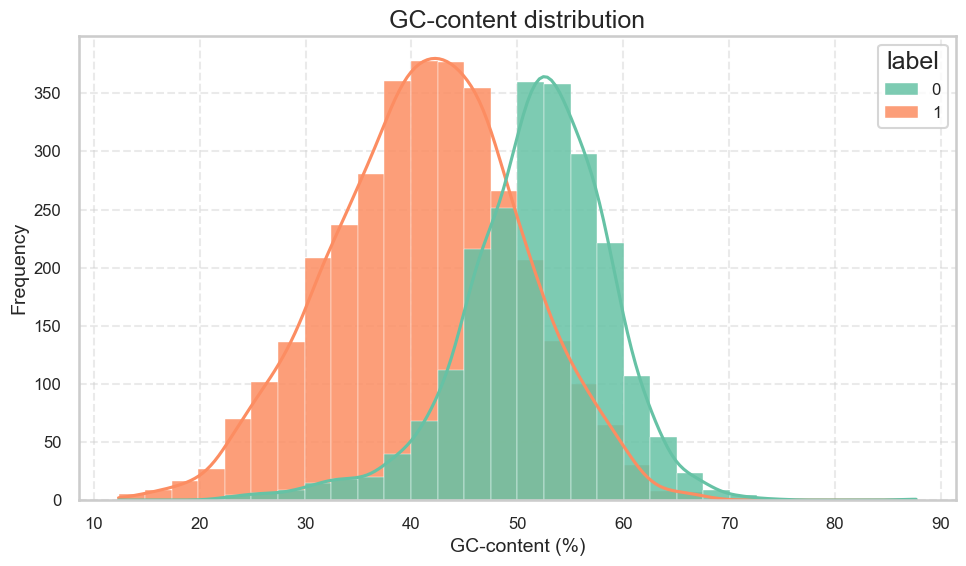

In [18]:
def gc_content(seq):
    seq = seq.upper()
    return (seq.count('G') + seq.count('C')) / len(seq) * 100

df['gc_content'] = df['sequence'].apply(gc_content)

plt.figure(figsize=(10,6))
sns.histplot(data=df, x="gc_content", hue="label", kde=True, bins=30, palette="Set2", alpha=0.85, linewidth=0.3)
plt.title("GC-content distribution")
plt.xlabel("GC-content (%)")
plt.ylabel("Frequency")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

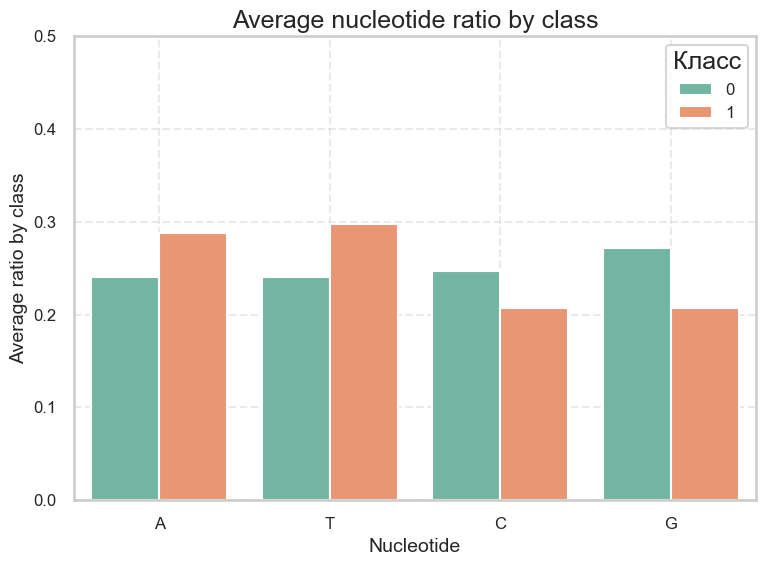

In [15]:
def nucleotide_frequencies(seq):
    seq = seq.upper()
    counts = Counter(seq)
    total = sum(counts.values())
    return {nt: counts.get(nt, 0)/total for nt in ['A', 'T', 'C', 'G']}

freqs_df = df.copy()
freqs_df = freqs_df.join(freqs_df['sequence'].apply(nucleotide_frequencies).apply(pd.Series))
nuc_means = freqs_df.groupby('label')[['A', 'T', 'C', 'G']].mean().reset_index()
nuc_means_melted = nuc_means.melt(id_vars='label', var_name='Nucleotide', value_name='Frequency')

plt.figure(figsize=(8,6))
sns.barplot(data=nuc_means_melted, x='Nucleotide', y='Frequency', hue='label', palette="Set2")
plt.title("Average nucleotide ratio by class")
plt.xlabel("Nucleotide")
plt.ylabel("Average ratio by class")
plt.ylim(0, 0.5)
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(title='Класс', loc='upper right')
plt.tight_layout()
plt.show()

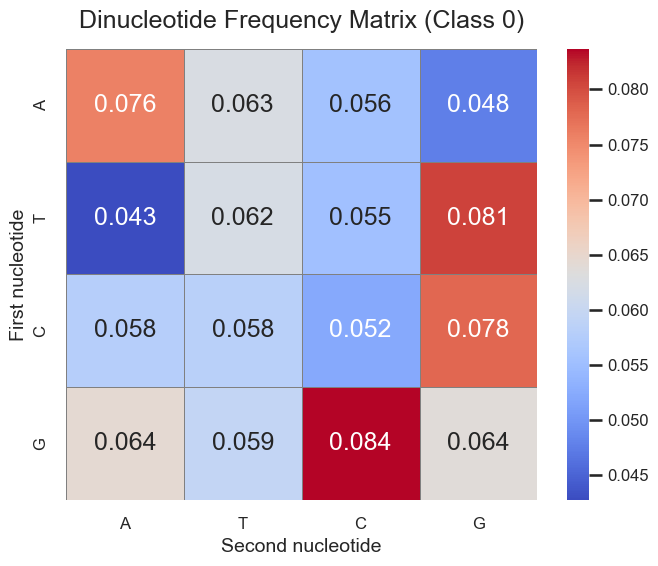

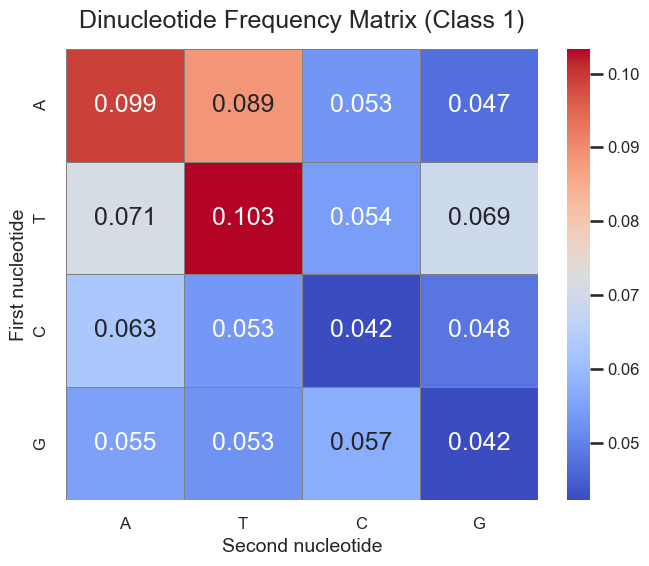

In [ ]:
dinucleotides = [''.join(p) for p in product('ATCG', repeat=2)]

def get_dinucleotide_counts(seq):
    seq = seq.upper()
    counts = Counter([seq[i:i+2] for i in range(len(seq)-1)])
    total = sum(counts.values())
    return {di: counts.get(di, 0)/total for di in dinucleotides}

df_dinu = df.copy()
df_dinu = df_dinu.join(df_dinu['sequence'].apply(get_dinucleotide_counts).apply(pd.Series))

dinu_grouped = df_dinu.groupby('label')[dinucleotides].mean()

for label in dinu_grouped.index:
    values = dinu_grouped.loc[label].values
    matrix = np.array(values).reshape(4, 4)
    
    plt.figure(figsize=(7, 6))
    ax = sns.heatmap(
        matrix, 
        annot=True, fmt=".3f", cmap="coolwarm", cbar=True,
        xticklabels=['A', 'T', 'C', 'G'], 
        yticklabels=['A', 'T', 'C', 'G'],
        linewidths=0.5, linecolor='gray'
    )
    
    ax.set_title(f'Dinucleotide Frequency Matrix (Class {label})', pad=15)
    ax.set_xlabel('Second nucleotide')
    ax.set_ylabel('First nucleotide')
    plt.tight_layout()
    plt.show()

Strong/weak promoter dataset

In [26]:
df = pd.read_csv(r'C:\Users\User\PROJECTS\chem_ai_project\data\stong_weak_promoter.csv')
df['label'].value_counts()

label
0    1791
1    1591
Name: count, dtype: int64

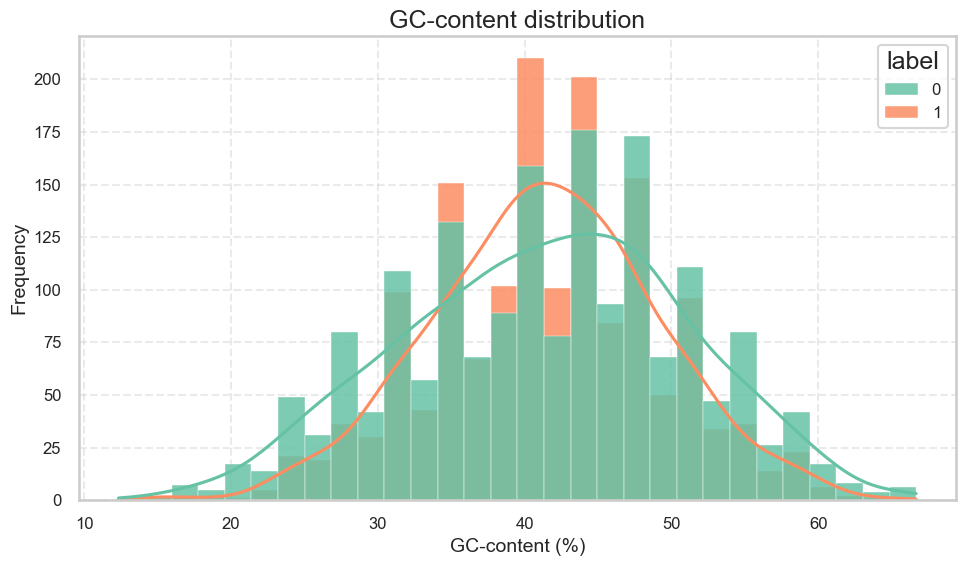

In [27]:
def gc_content(seq):
    seq = seq.upper()
    return (seq.count('G') + seq.count('C')) / len(seq) * 100

df['gc_content'] = df['sequence'].apply(gc_content)

plt.figure(figsize=(10,6))
sns.histplot(data=df, x="gc_content", hue="label", kde=True, bins=30, palette="Set2", alpha=0.85, linewidth=0.3)
plt.title("GC-content distribution")
plt.xlabel("GC-content (%)")
plt.ylabel("Frequency")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

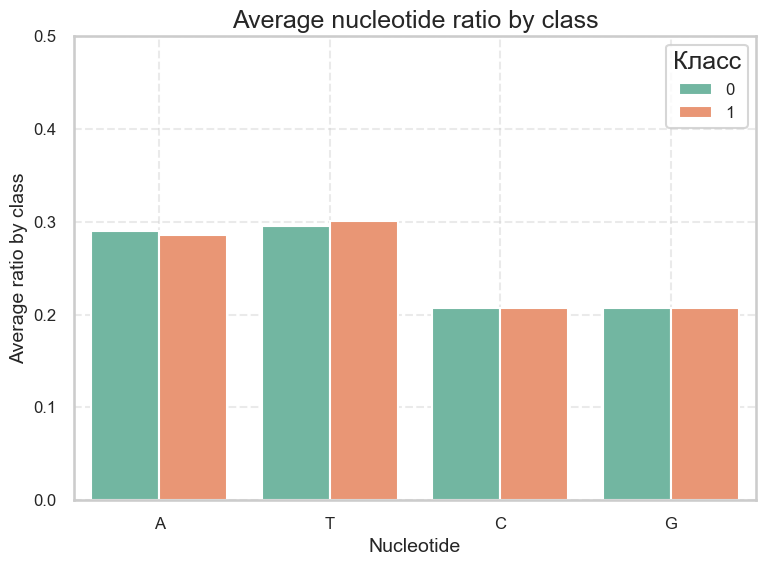

In [28]:
def nucleotide_frequencies(seq):
    seq = seq.upper()
    counts = Counter(seq)
    total = sum(counts.values())
    return {nt: counts.get(nt, 0)/total for nt in ['A', 'T', 'C', 'G']}

freqs_df = df.copy()
freqs_df = freqs_df.join(freqs_df['sequence'].apply(nucleotide_frequencies).apply(pd.Series))
nuc_means = freqs_df.groupby('label')[['A', 'T', 'C', 'G']].mean().reset_index()
nuc_means_melted = nuc_means.melt(id_vars='label', var_name='Nucleotide', value_name='Frequency')

plt.figure(figsize=(8,6))
sns.barplot(data=nuc_means_melted, x='Nucleotide', y='Frequency', hue='label', palette="Set2")
plt.title("Average nucleotide ratio by class")
plt.xlabel("Nucleotide")
plt.ylabel("Average ratio by class")
plt.ylim(0, 0.5)
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(title='Класс', loc='upper right')
plt.tight_layout()
plt.show()

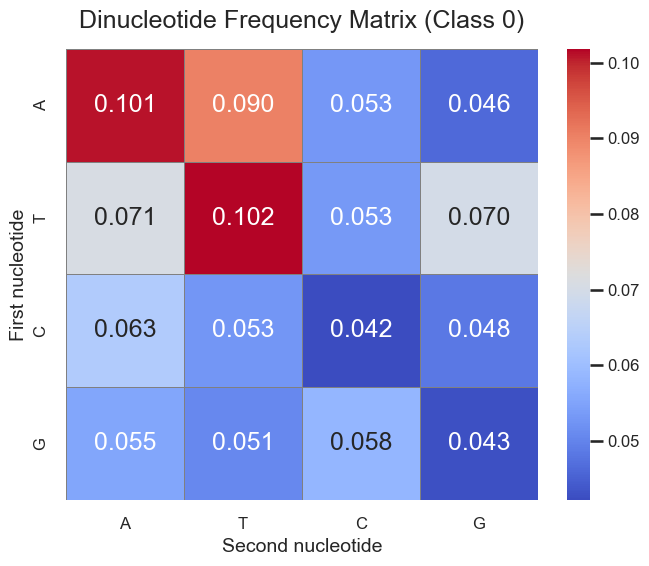

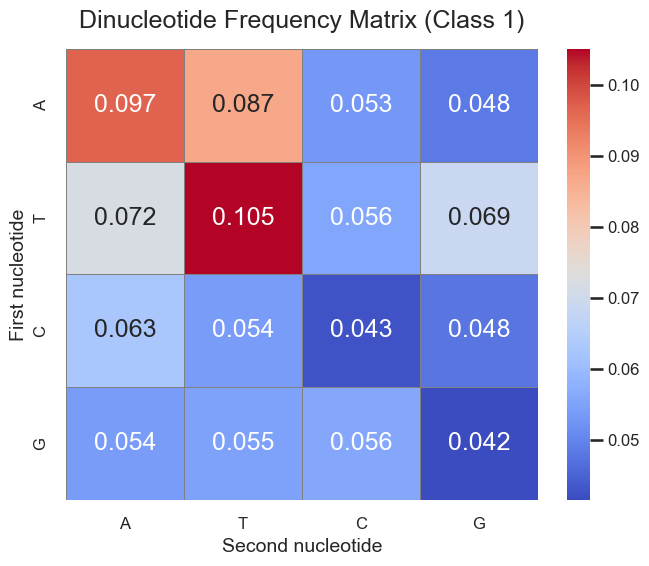

In [ ]:
dinucleotides = [''.join(p) for p in product('ATCG', repeat=2)]

def get_dinucleotide_counts(seq):
    seq = seq.upper()
    counts = Counter([seq[i:i+2] for i in range(len(seq)-1)])
    total = sum(counts.values())
    return {di: counts.get(di, 0)/total for di in dinucleotides}

df_dinu = df.copy()
df_dinu = df_dinu.join(df_dinu['sequence'].apply(get_dinucleotide_counts).apply(pd.Series))

dinu_grouped = df_dinu.groupby('label')[dinucleotides].mean()

for label in dinu_grouped.index:
    values = dinu_grouped.loc[label].values
    matrix = np.array(values).reshape(4, 4)
    
    plt.figure(figsize=(7, 6))
    ax = sns.heatmap(
        matrix, 
        annot=True, fmt=".3f", cmap="coolwarm", cbar=True,
        xticklabels=['A', 'T', 'C', 'G'], 
        yticklabels=['A', 'T', 'C', 'G'],
        linewidths=0.5, linecolor='gray'
    )
    
    ax.set_title(f'Dinucleotide Frequency Matrix (Class {label})', pad=15)
    ax.set_xlabel('Second nucleotide')
    ax.set_ylabel('First nucleotide')
    plt.tight_layout()
    plt.show()